In [1]:
import os
import jax
import numpy as np
import torch
import torchtext
import torchvision
import torchvision.transforms as transforms
from datasets import DatasetDict, load_dataset
from torch.utils.data import TensorDataset, random_split
from tqdm import tqdm

/home/grifon/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print("[*] Generating MNIST Classification Dataset...")

# Constants
SEQ_LENGTH, N_CLASSES, IN_DIM = 784, 10, 1
tf = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=0.5, std=0.5),
        transforms.Lambda(lambda x: x.view(IN_DIM, SEQ_LENGTH).t()),
    ]
)

train = torchvision.datasets.MNIST(
    "./data", train=True, download=True, transform=tf
)
test = torchvision.datasets.MNIST(
    "./data", train=False, download=True, transform=tf
)

# Return data loaders, with the provided batch size
trainloader = torch.utils.data.DataLoader(
    train, batch_size=4, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    test, batch_size=4, shuffle=False
)

[*] Generating MNIST Classification Dataset...


In [6]:
train = torchvision.datasets.MNIST(
    "./data", train=True, download=True, transform=tf
)

In [3]:
train.data.shape

torch.Size([60000, 28, 28])

In [42]:
for label, pic in enumerate(trainloader):
    break

pic[0][0].shape
pic = (pic[0][0]).reshape((1,28,28,1))
pic.shape

torch.Size([1, 28, 28, 1])

In [43]:
pic.reshape(-1)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.2471,  0.9373,  0.8118,
         0.0039, -0.8980, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -0.2471,  0.9529,  0.3098, -0.79

In [44]:
from foolbox.attacks.spatial_attack_transformations import rotate_and_shift
from eagerpy.tensor import TensorFlowTensor, PyTorchTensor
import eagerpy as ep
pic_t, restore_type = ep.astensor_(pic)
pic_t = pic_t.reshape((1,1,28,28))

In [13]:
"""
def rotate_and_shift(
    inputs: Tensor,
    translation: Tuple[float, float] = (0.0, 0.0),
    rotation: float = 0.0,
) -> Any:
    rotation = rotation * math.pi / 180.0
    if isinstance(inputs, TensorFlowTensor):
        transformed_tensor = transform_tf(inputs, translation, rotation)
    elif isinstance(inputs, PyTorchTensor):
        transformed_tensor = transform_pt(inputs, translation, rotation)
    else:
        raise NotImplementedError()

    return transformed_tensor

"""

In [45]:
rotated = rotate_and_shift(pic_t, (5.,2.), 10.)

rotate_and_shift dostava na inputu shape torch.Size([1, 1, 28, 28])


In [46]:
#rotated.reshape(-1)
rotated.sum()

PyTorchTensor(tensor(-472.8346))

In [65]:
r = (rotated+1)/2
r = r.reshape((28,28,1))
r = restore_type(r)
r

tensor([[[1.0529e-01],
         [1.8467e-02],
         [0.0000e+00],
         [0.0000e+00],
         [2.9802e-08],
         [0.0000e+00],
         [0.0000e+00],
         [4.7161e-03],
         [1.4381e-01],
         [1.3964e-01],
         [2.0943e-02],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [2.9802e-08],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [3.3464e-02],
         [5.0000e-01],
         [5.0000e-01],
         [5.0000e-01],
         [5.0000e-01],
         [5.0000e-01],
         [5.0000e-01],
         [5.0000e-01]],

        [[0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [2.9306e-02],
         [3.5846e-01],
         [9.5307e-01],
         [7.4965e-01],
         [3.6631e-01],
         [6.9710e-02],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         [0.0000e+00],
         

In [61]:
import matplotlib.pyplot as plt


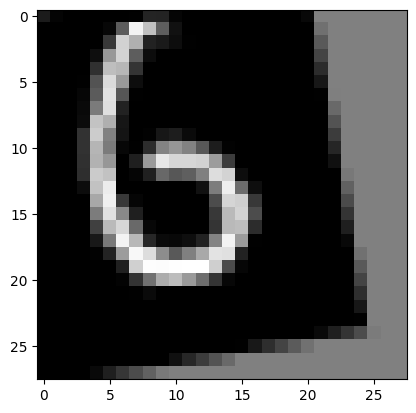

In [66]:
plt.imshow(r, cmap='gray')
plt.show()